In [51]:
from sqlalchemy import create_engine

import pandas as pd
import numpy as np
from sklearn import preprocessing

engine = create_engine(r'sqlite:///I:\stock_data\quote.db')

stkid = r'C:\Users\bkgrslbhee\Desktop\aWholeNewWorld\Capital-Testing\stkid.txt'

print(engine.table_names())

# df = pd.read_sql_query("SELECT * FROM kline WHERE id = '8463'", engine, index_col='date')

temp = {}
with open(stkid, 'r', encoding='utf-8') as f:
    for l in f:
        name = l.split(' ')[0]
        temp[name] = pd.read_sql_query("SELECT * FROM kline WHERE id = '{}'".format(name), engine, index_col='date', parse_dates=['date'])
        
allstockdata = pd.Panel(temp)



['kline']


In [53]:
allstockdata.loc[:,:,'ma5'] = allstockdata.loc[:,:,'close'].rolling(window=5).mean()
allstockdata.loc[:,:,'ma20'] = allstockdata.loc[:,:,'close'].rolling(window=20).mean()
allstockdata.loc[:,:,'ma60'] = allstockdata.loc[:,:,'close'].rolling(window=60).mean()

In [32]:
interesting_col = 'open,high,low,close,ma5,ma20,ma60'.split(',')
interesting_col

['open', 'high', 'low', 'close', 'ma5', 'ma20', 'ma60']

In [107]:
from sklearn import preprocessing

def normailize(dfToNormalize):
    
    s=preprocessing.MinMaxScaler()
    s.fit(dfToNormalize.as_matrix().reshape(-1, 1))
#     s.transform(dfToNormalize)
    return pd.DataFrame(s.transform(dfToNormalize), columns=dfToNormalize.columns, index=dfToNormalize.index)
#     return dfToNormalize
#     return s.transform(dfToNormalize)

c:\users\bkgrslbhee\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


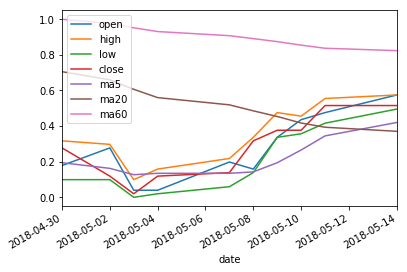

In [108]:
targetdf=allstockdata.loc['2330'].dropna()
int_col_p = [targetdf.columns.get_loc(c) for c in interesting_col]
a = normailize(targetdf.iloc[-10:,int_col_p])

a.plot()
# a

In [109]:
targetdf.loc[:,'diff'] = targetdf.loc[:,'close']-targetdf.loc[:,'open']
# targetdf.loc[:,'diff'] = targetdf.loc[:,'diff']/targetdf.loc[:,'diff'].abs()
# targetdf..rolling(window=5).sum()
# targetdf
# targetdf

c:\users\bkgrslbhee\appdata\local\programs\python\python35\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
c:\users\bkgrslbhee\appdata\local\programs\python\python35\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [131]:
data = []
label = []

# targetdf=targetdf.iloc[-30:,:]

p=0
window = 20
# cnt_window = 10
while p + window < len(targetdf):
    data.append(normailize(targetdf.iloc[p:p+window,int_col_p]).as_matrix())
    if targetdf.iloc[p+window,targetdf.columns.get_loc('diff')] > 0:
        label.append(1)
    else:
        label.append(0)
#     label.append(sum(1 for y in targetdf.iloc[p+window:p+window+cnt_window, targetdf.columns.get_loc('diff')] if y > 0)/10)
    p+=1



c:\users\bkgrslbhee\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [135]:
data = np.array(data)
label = np.array(label)
# data.shape
data[4]

array([[0.42857143, 0.57142857, 0.42857143, 0.5       , 0.42857143,
        0.44285714, 0.63809524],
       [0.5       , 0.57142857, 0.42857143, 0.42857143, 0.41428571,
        0.44642857, 0.6797619 ],
       [0.42857143, 0.42857143, 0.35714286, 0.35714286, 0.4       ,
        0.45      , 0.71011905],
       [0.35714286, 0.42857143, 0.35714286, 0.42857143, 0.41428571,
        0.45      , 0.73095238],
       [0.42857143, 0.42857143, 0.21428571, 0.35714286, 0.41428571,
        0.45      , 0.73928571],
       [0.35714286, 0.42857143, 0.28571429, 0.42857143, 0.4       ,
        0.45714286, 0.73690476],
       [0.42857143, 0.42857143, 0.28571429, 0.35714286, 0.38571429,
        0.46071429, 0.7202381 ],
       [0.64285714, 1.        , 0.57142857, 0.85714286, 0.48571429,
        0.47857143, 0.71428571],
       [0.85714286, 0.85714286, 0.64285714, 0.71428571, 0.54285714,
        0.48571429, 0.70595238],
       [0.71428571, 0.78571429, 0.64285714, 0.71428571, 0.61428571,
        0.49285714, 0.6

In [114]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

from sklearn.model_selection import train_test_split

In [134]:

max_features = 20000
maxlen = 80  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

x_train,x_test,y_train,y_test = train_test_split(data, label, test_size=0.33, random_state=42)

print('Build model...')
model = Sequential()
# model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, input_shape=(20, 7)))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Build model...
Train...
Train on 4003 samples, validate on 1972 samples
Epoch 1/15
4003/4003 [==============================] - 6s 1ms/step - loss: 0.6890 - acc: 0.5601 - val_loss: 0.6819 - val_acc: 0.5801
Epoch 2/15
4003/4003 [==============================] - 5s 1ms/step - loss: 0.6866 - acc: 0.5646 - val_loss: 0.6824 - val_acc: 0.5801
Epoch 3/15
4003/4003 [==============================] - 5s 1ms/step - loss: 0.6843 - acc: 0.5676 - val_loss: 0.6810 - val_acc: 0.5801
Epoch 4/15
4003/4003 [==============================] - 5s 1ms/step - loss: 0.6844 - acc: 0.5698 - val_loss: 0.6805 - val_acc: 0.5801
Epoch 5/15
4003/4003 [==============================] - 5s 1ms/step - loss: 0.6833 - acc: 0.5683 - val_loss: 0.6802 - val_acc: 0.5801
Epoch 6/15
4003/4003 [==============================] - 5s 1ms/step - loss: 0.6840 - acc: 0.5646 - val_loss: 0.6807 - val_acc: 0.5801
Epoch 7/15
4003/4003 [==============================] - 5s 1ms/step - loss: 0.6818 - acc: 0.5691 - val_loss: 0.6816 - val_ac